# **Preliminary Round FIT Competition 2024**

### **Description:**
Happiness of a city can be a reflection of government success in managing their people and country, not only focusing in physical fields like infrastructure, but also in social problems, economy, and culture. There are many variables that can affect the happiness index of a city, include High GDP per capita, social support in times of need, absence of corruption in government, healthy life expectancy, freedom to make life choices, and generosity or charity towards others.

### **Atribut:**
1.	id - City or Regency identifier
2.	city_or_regency - Name of City or Regency
3.	year - The year in which the data is recorded
4.	total_area - Area of City or Regency (KM^2)
5.	population - The Number of Residents in One City or Regency
6.	densities - Density Level (Population/KM^2)
7.	traffic_density - Categories for Traffic Density (Low/Medium/High)
8.	green_open_space - Area of Green Open Space (KM^2)
9.	hdi - Index of Human Development for Each City or Regency
10.	gross_regional_domestic_product - Total Gross Value Added at Current Prices (Billion Rupiah)
11.	total_landfills - Number of Landfills per City or Regency
12.	solid_waste_generated - The amount of waste each City or Regency generated from various sources for a year (Tens of Tons)
13.	happiness_score - Score to Measure The Level of Happiness for each city or Regency (0 - 100)

### **Business Understanding:**
1.	Background:
  - The happiness of a city is an important indicator of the well-being of its people. Governments are responsible for creating an environment that supports the happiness of citizens by managing various physical, social, economic and cultural aspects.
  - The City Happiness Index is influenced by various factors, including GDP per capita, social support, government corruption, life expectancy, freedom of choice, and generosity.
  - Understanding the factors that influence city happiness can help governments design effective policies to improve the well-being of citizens.
2.	Challenges:
  - Identify the variables that most significantly affect the happiness index.
  - Measure the impact of various social, economic, and environmental factors on citizens' happiness.
  - Collect and analyze data from various cities and districts with different characteristics.
3.	Opportunities:
  - The results of the analysis can provide valuable insights for the government and other stakeholders in designing better policies to improve citizens' happiness.
  - By identifying key factors that affect happiness, the government can allocate resources more efficiently and effectively.

### **Goals:**
  - Goals: Identify the variables that most significantly affect the happiness index of a city or district.
  - Key Performance Indicator: Regression coefficient and significance level for each variable in the regression analysis model.

In [238]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [239]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [240]:
##display the first five rows of the train dataset.
train.head(5)

,id,city_or_regency,year,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,happiness_score
0,11012022,Simeulue,2022,"1,838.09","94,876",51.62,Low,0.12,67.27,"2,688",1.0,"1,628.09",72.37
1,11032022,Aceh Selatan,2022,"4,173.82","237,376",56.87,Low,NaN,67.87,"6,447",1.0,"3,521.77",72.54
2,11042022,Aceh Tenggara,2022,"4,242.04","228,308",53.82,Low,NaN,70.32,"5,829",1.0,"3,333.30",72.38
3,11062022,Aceh Tengah,2022,"4,527.53","222,673",49.18,Low,1.11,73.95,"8,873",1.0,NaN,71.38
4,11072022,Aceh Barat,2022,"2,927.95","202,858",69.28,Low,0.01,72.34,"12,730",1.0,"3,702.16",72.36


In [241]:
##display the first five rows of the test dataset.
test.head(5)

,id,city_or_regency,year,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated
0,11022022,Aceh Singkil,2022,"1,857.88","130,787",70.40,Low,685.53,69.62,"3,005",1.0,"1,926.13"
1,11052022,Aceh Timur,2022,"6,040.60","432,849",71.66,Low,0.09,68.72,"13,101",2.0,"6,319.60"
2,11092022,Pidie,2022,"3,184.46","444,505",139.59,Low,0.42,71.20,"12,412",1.0,"6,489.77"
3,11182022,Pidie Jaya,2022,952.11,"162,771",170.96,Low,0.05,74.34,"3,980",1.0,"2,902.94"
4,11752022,City of Subulussalam,2022,"1,391.00","95,199",68.44,Low,0.20,66.20,"2,365",1.0,"1,353.00"


In [242]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['id']
test_ID = test['id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping id feature is : {} ".format(train.shape)) 
print("The test data size after dropping id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (822, 13) 
The test data size before dropping Id feature is : (206, 12) 

The train data size after dropping id feature is : (822, 12) 
The test data size after dropping id feature is : (206, 11) 


# Data Processing

## Outliers

Let's explore these outliers


In [243]:
obj_features = ['total_area (km2)', 'population', 'green_open_space', 'gross_regional_domestic_product', 'solid_waste_generated']

# train dataset
for col in obj_features:
    train[col] = train[col].replace('#REF!', np.nan)
    train[col] = train[col].astype(str)
    train[col] = train[col].str.replace(',','').astype(float)

# test dataset
for col in obj_features:
    test[col] = test[col].replace('#REF!', np.nan)
    test[col] = test[col].astype(str)
    test[col] = test[col].str.replace(',','').astype(float)

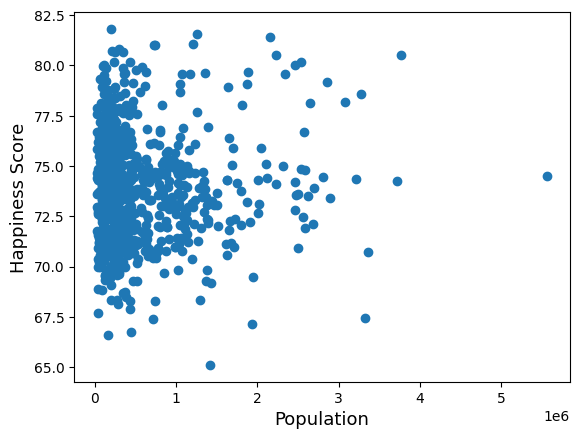

In [244]:
fig, ax = plt.subplots()
ax.scatter(x = train['population'], y = train['happiness_score'])
plt.ylabel('Happiness Score', fontsize=13)
plt.xlabel('Population', fontsize=13)
plt.show()

We can see at the population values are huge oultliers. Therefore, we can safely delete them.

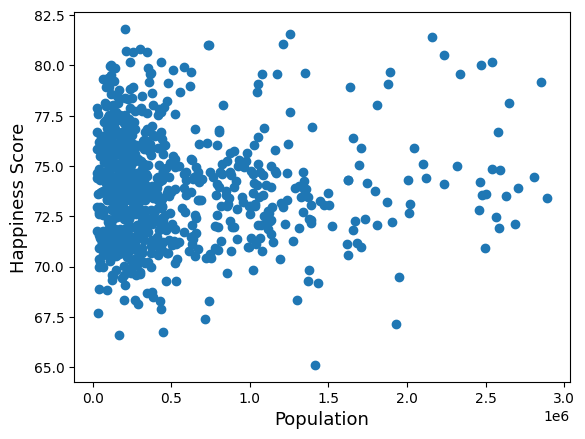

In [245]:
#Deleting outliers
train = train.drop(train[(train['population']>3000000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['population'], train['happiness_score'])
plt.ylabel('Happiness Score', fontsize=13)
plt.xlabel('Population', fontsize=13)
plt.show()

## Target Variable

**happiness_score** is the variable we need to predict. So let's do some analysis on this variable first.


 mu = 73.91 and sigma = 2.69



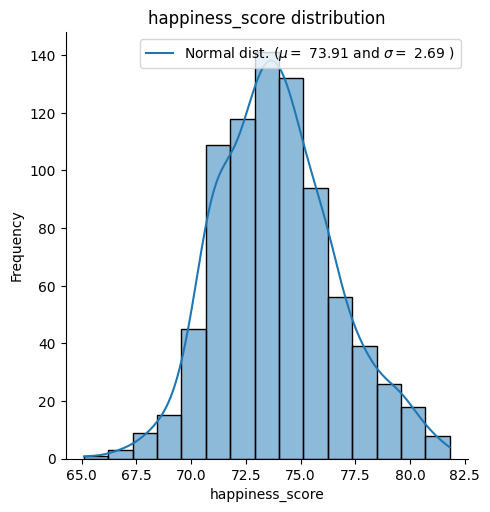

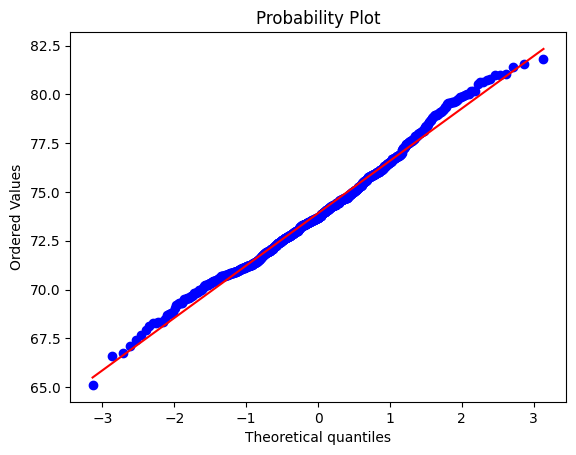

In [246]:
sns.displot(train['happiness_score'] , kde=True, bins=15);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['happiness_score'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('happiness_score distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['happiness_score'], plot=plt)
plt.show()

The skew seems now corrected and the data appears more normally distributed. 

## Features engineering

let's first  concatenate the train and test data in the same dataframe

In [247]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.happiness_score.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['happiness_score'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1020, 11)


### Missing Data

In [248]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
total_landfills,49.019608
solid_waste_generated,48.529412
green_open_space,47.549020


Text(0.5, 1.0, 'Percent missing data by feature')

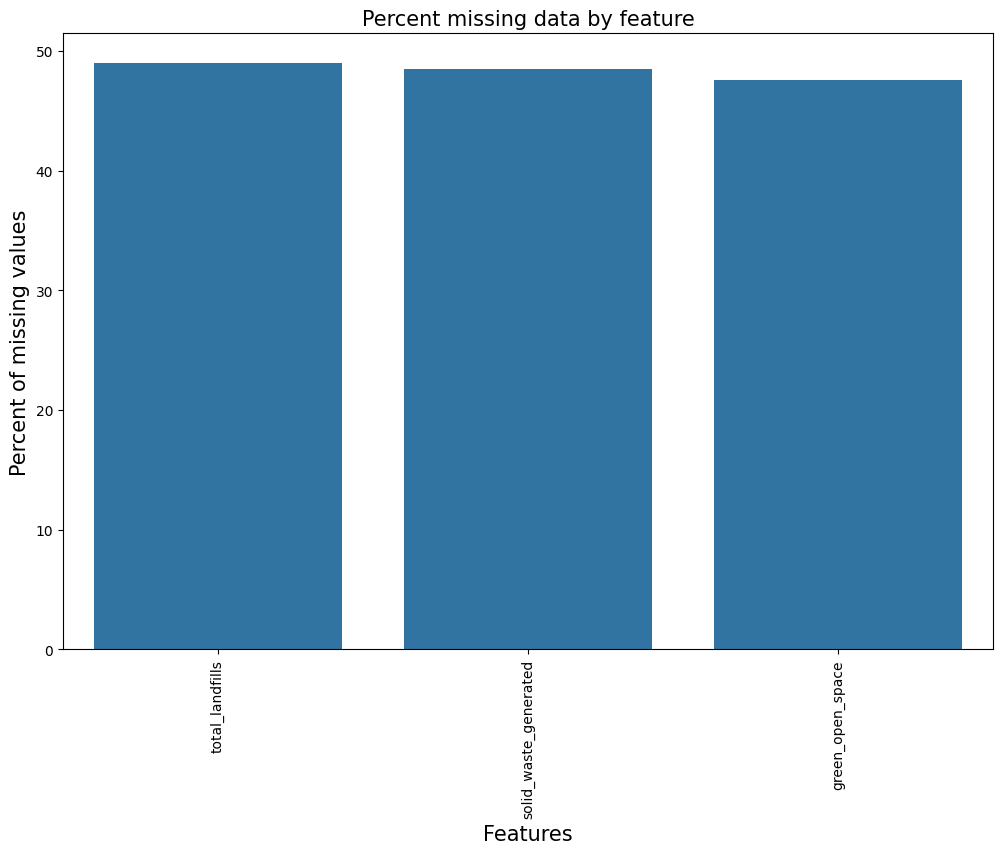

In [249]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

**Data Correlation**


In [250]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   city_or_regency                  1020 non-null   object 
 1   year                             1020 non-null   int64  
 2   total_area (km2)                 1020 non-null   float64
 3   population                       1020 non-null   float64
 4   densities                        1020 non-null   float64
 5   traffic_density                  1020 non-null   object 
 6   green_open_space                 535 non-null    float64
 7   hdi                              1020 non-null   float64
 8   gross_regional_domestic_product  1020 non-null   float64
 9   total_landfills                  520 non-null    float64
 10  solid_waste_generated            525 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 87.8+ KB


<Axes: >

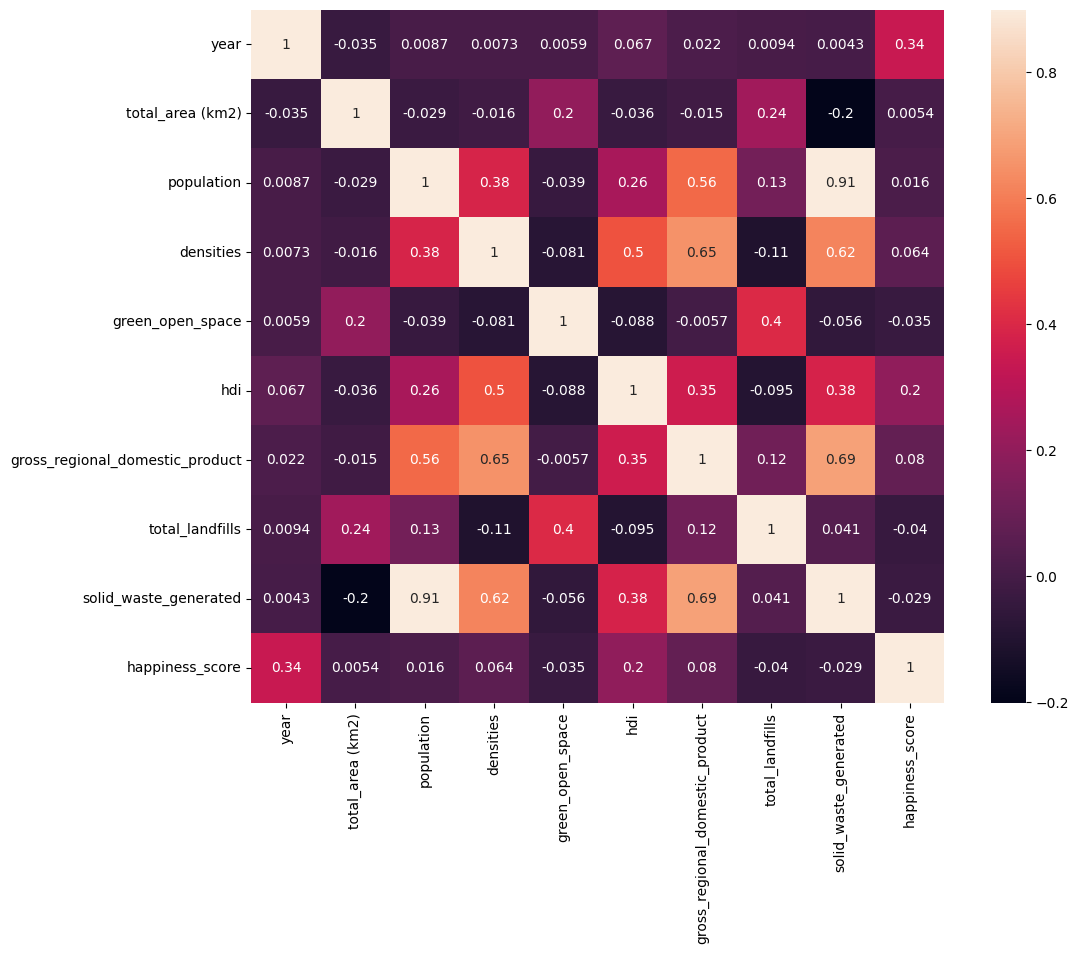

In [251]:
#Correlation map to see how features are correlated with SalePrice
numeric_train = train.select_dtypes(include=[np.number])
corrmat = numeric_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

### Imputing missing values 

We impute them  by proceeding sequentially  through features with missing values 

In [252]:
all_data.describe()

,year,total_area (km2),population,densities,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated
count,1020.000000,1.020000e+03,1.020000e+03,1020.000000,535.000000,1020.000000,1020.000000,520.000000,525.000000
mean,2022.500000,7.002712e+04,5.145403e+05,1092.445552,126.544841,70.897863,36795.985294,1.261538,11037.177419
std,0.500245,2.109621e+06,5.765100e+05,2619.333804,606.792138,6.396438,80639.865894,0.826384,12939.042479
min,2022.000000,1.073000e+01,2.501500e+04,0.000000,0.000000,34.100000,256.000000,1.000000,481.800000
25%,2022.000000,8.061475e+02,1.579518e+05,52.575000,0.110000,67.855000,6460.500000,1.000000,3071.020000
50%,2022.500000,1.896580e+03,2.894345e+05,155.850000,0.830000,70.630000,15463.500000,1.000000,5939.620000
75%,2023.000000,4.355350e+03,6.446142e+05,858.826043,20.555000,74.005000,34257.750000,1.000000,14283.543000
max,2023.000000,6.737960e+07,5.643838e+06,22150.590000,6881.990000,88.280000,860049.000000,8.000000,84425.243000


- **total_landfills** : 1 is the most common value so we can fill in missing value with mode 

In [253]:
all_data["total_landfills"] = all_data["total_landfills"].fillna(all_data["total_landfills"].mean())

- **solid_waste_generated** : since the waste generated is connected to the population, we can fill in missing value by the waste of the population

In [254]:
all_data["solid_waste_generated"] = all_data.groupby("traffic_density")["solid_waste_generated"].transform(lambda x: x.fillna(x.median()))

- **green_open_space** : 

In [255]:
all_data["green_open_space"] = all_data.groupby("traffic_density")["green_open_space"].transform(lambda x: x.fillna(x.median()))

Is there any remaining missing value ? 

In [256]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


It remains no missing value.


### More features engeneering

**Transforming some numerical variables that are really categorical**

**Label Encoding some categorical variables that may contain information in their ordering set** 

In [257]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
all_data['traffic_density'] = all_data['traffic_density'].astype(str)

all_data['traffic_density_encoded'] = encoder.fit_transform(all_data[['traffic_density']])

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (1020, 12)


**Skewed features**

In [258]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
total_area (km2),31.890071
green_open_space,11.338815
gross_regional_domestic_product,6.316286
total_landfills,6.311285
densities,4.198098
solid_waste_generated,3.522795
population,2.488534
traffic_density_encoded,1.274085
year,0.000000
hdi,-0.779725


**Box Cox Transformation of (highly) skewed features**

We use the scipy  function boxcox1p which computes the Box-Cox transformation of **\\(1 + x\\)**. 

In [259]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 10 skewed numerical features to Box Cox transform


In [260]:
train = all_data[:ntrain].drop(['city_or_regency', 'year', 'traffic_density'], axis=1)
test = all_data[ntrain:].drop(['city_or_regency', 'year', 'traffic_density'], axis=1)
train

,total_area (km2),population,densities,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,traffic_density_encoded
0,13.920624,30.528189,5.413735,0.114297,5.894883,15.127856,0.730463,13.549579,0.730463
1,16.614482,36.013346,5.587302,0.599218,5.911381,18.183110,0.730463,16.028918,0.730463
2,16.671155,35.764717,5.488183,0.599218,5.977507,17.810380,0.730463,15.842501,0.730463
3,16.900226,35.605954,5.328004,0.790110,6.072015,19.402470,0.730463,17.655804,0.730463
4,15.409087,35.019109,5.949677,0.009958,6.030589,20.852680,0.730463,16.199566,0.730463
...,...,...,...,...,...,...,...,...,...
809,14.551466,35.023115,6.454709,0.599218,5.376915,14.658881,0.868092,17.655804,0.730463
810,16.237804,27.032054,3.250416,0.599218,5.364969,13.114203,0.868092,17.655804,0.730463
811,16.743329,31.066602,4.144828,0.599218,5.387749,13.418592,0.868092,17.655804,0.730463
812,16.398246,32.625066,4.738941,0.599218,5.363912,13.107880,0.868092,17.655804,0.730463


In [261]:
test.head()

,total_area (km2),population,densities,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,traffic_density_encoded
814,13.953703,32.362918,5.979633,11.091890,5.958813,15.495238,0.730463,14.065533,0.730463
815,17.941629,40.037901,6.012860,0.086737,5.934546,20.971509,1.194318,18.108837,0.730463
816,15.688842,40.224429,7.332491,0.360043,6.000787,20.748460,0.730463,18.207765,0.730463
817,11.987687,33.664956,7.761889,0.048969,6.081936,16.449061,0.730463,15.380708,0.730463
818,13.078219,30.547156,5.926942,0.184838,5.865153,14.713493,0.730463,12.996413,0.730463


# Modelling

**Import librairies**

In [262]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

**Define a cross validation strategy**

We use the **cross_val_score** function of Sklearn. However this function has not a shuffle attribut, we add then one line of code,  in order to shuffle the dataset  prior to cross-validation

In [263]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## Base models

-  **LASSO  Regression**  : 

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's  **Robustscaler()**  method on pipeline 

In [264]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

- **Elastic Net Regression** :

again made robust to outliers

In [265]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

- **Kernel Ridge Regression** :

In [266]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

- **Gradient Boosting Regression** :

With **huber**  loss that makes it robust to outliers
    

In [267]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

- **XGBoost** :

In [268]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



### Base models scores

Let's see how these base models perform on the data by evaluating the  cross-validation rmsle error

In [269]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 2.8583 (0.4892)



In [270]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 2.8583 (0.4892)



In [271]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 8.5062 (11.0655)



In [272]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 2.8443 (0.4210)



## Stacking  models

### Simplest Stacking approach : Averaging base models

We begin with this simple approach of averaging base models.  We build a new **class**  to extend scikit-learn with our model and also to laverage encapsulation and code reuse ([inheritance][1]) 


  [1]: https://en.wikipedia.org/wiki/Inheritance_(object-oriented_programming)

**Averaged base models class**

In [273]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

**Averaged base models score**

We just average four models here **ENet, GBoost,  KRR and lasso**.  Of course we could easily add more models in the mix. 

In [274]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 3.8820 (2.0739)



### Less simple Stacking : Adding a Meta-model

**Stacking averaged Models Class**

In [275]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

**Stacking Averaged models Score**

To make the two approaches comparable (by using the same number of models) , we just average **Enet KRR and Gboost**, then we add **lasso as meta-model**.

In [276]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 4.0673 (2.4524)


## Ensembling StackedRegressor, XGBoost and LightGBM

We add **XGBoost and LightGBM** to the **StackedRegressor** defined previously. 

We first define a rmsle evaluation function 

In [277]:
def rmsle(y, y_pred):
    return (mean_squared_error(y, y_pred))

### Final Training and Prediction

**StackedRegressor:**

In [278]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = stacked_averaged_models.predict(test.values)
print(rmsle(y_train, stacked_train_pred))

3.0516553967398194


**XGBoost:**

In [279]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = model_xgb.predict(test)
print(rmsle(y_train, xgb_train_pred))

c:\Users\Aryo Sasi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:53:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


0.6025598287343726


In [280]:
y_train

array([72.37, 72.54, 72.38, 71.38, 72.36, 72.91, 73.03, 70.79, 71.79,
       71.92, 72.63, 76.15, 72.21, 74.78, 73.76, 70.92, 72.96, 70.69,
       71.09, 71.33, 71.41, 71.12, 71.35, 71.09, 69.83, 70.68, 71.1 ,
       71.01, 70.04, 70.82, 70.89, 71.03, 71.24, 71.18, 70.88, 70.96,
       71.13, 70.9 , 70.91, 71.19, 70.94, 71.07, 71.26, 71.24, 69.86,
       72.1 , 71.05, 71.14, 70.82, 70.99, 70.84, 71.36, 70.85, 71.23,
       71.25, 71.28, 68.69, 71.9 , 72.43, 73.78, 70.76, 71.7 , 73.92,
       72.8 , 71.42, 72.44, 76.11, 75.15, 75.9 , 77.35, 76.25, 78.98,
       74.61, 70.92, 71.47, 72.43, 71.11, 75.27, 71.69, 70.74, 75.74,
       73.4 , 72.52, 70.97, 72.37, 74.2 , 71.99, 66.6 , 70.1 , 69.74,
       69.52, 68.35, 71.05, 70.73, 68.5 , 69.63, 70.51, 73.57, 72.25,
       73.65, 72.04, 70.68, 68.28, 73.51, 71.48, 71.53, 70.48, 71.37,
       72.95, 72.79, 73.67, 74.58, 73.49, 74.32, 75.91, 74.08, 74.29,
       75.82, 74.18, 73.38, 75.48, 74.67, 74.87, 72.98, 74.11, 72.06,
       72.82, 73.73,

In [281]:
ensemble = stacked_pred*0.30 + xgb_pred*0.70
ensemble

array([72.10017609, 72.72797865, 73.36853983, 74.56781997, 72.85294731,
       73.99631745, 74.00677972, 72.99226289, 71.9230271 , 73.97587938,
       72.69731253, 74.4812926 , 71.4003174 , 73.77950025, 73.99508383,
       72.14169406, 71.32384777, 72.36400934, 73.14677928, 74.87875917,
       71.76870431, 75.14130171, 76.22448278, 75.19569781, 77.35625576,
       74.69908899, 74.24350417, 72.99632389, 73.22816484, 74.07886073,
       72.38657422, 76.30662519, 75.47444249, 77.50938222, 74.36373796,
       75.13374204, 75.23069452, 72.1232679 , 73.28729061, 74.70853348,
       74.86717517, 73.52005831, 71.4426148 , 76.24449094, 73.01100017,
       73.96087603, 74.87975898, 73.34929415, 77.30204384, 74.63066945,
       72.88375423, 73.22362916, 77.37384404, 74.3415965 , 74.88793361,
       72.60354348, 73.41809447, 74.01533886, 70.11274656, 72.12355715,
       72.69112846, 71.39873822, 75.37589954, 73.62511471, 72.82207418,
       75.36692029, 75.68569617, 75.70351035, 71.29894337, 73.28

**Submission**

In [282]:
sub = pd.DataFrame()
sub['id'] = test_ID
sub['happiness_score'] = xgb_pred
sub.to_csv('submission2.csv',index=False)